In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('KNN_Project_Data')

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [77]:
# lets normalize it
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_data=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [12]:
scaled_data # normalised data

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [83]:
df_scaled=pd.DataFrame(data=scaled_data,columns=df.columns[:-1])

In [84]:
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [33]:
from sklearn.model_selection import train_test_split

In [37]:
X=df_scaled
y=df['TARGET CLASS']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=39, p=2,
           weights='uniform')

In [42]:
predictions=knn.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

[[109  43]
 [ 41 107]]


In [46]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i=knn.predict(X_test)
    error_rate.append(np.mean(predictions_i!=y_test))

In [47]:
sns.set_style('whitegrid')

Text(0, 0.5, 'error_rate')

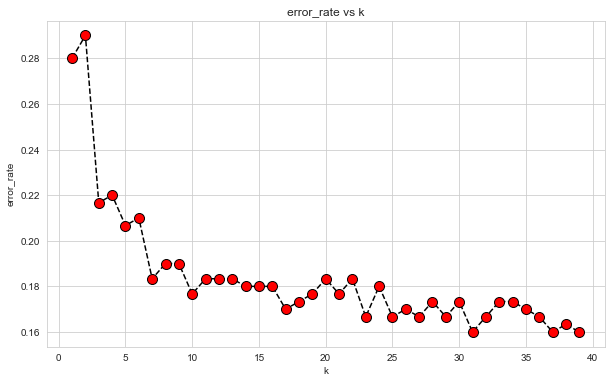

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black',markersize=10,linestyle='dashed',
        marker='o',markerfacecolor='red')
plt.title('error_rate vs k')
plt.xlabel('k')
plt.ylabel('error_rate')

In [87]:
knn=KNeighborsClassifier(n_neighbors=30) # 32
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[124  28]
 [ 24 124]]
